In [34]:
from common_code.common import *
from common_code.plotting import *
from Trainers.DatasetBC import *
import numpy as np
import sys
import os
import matplotlib.pyplot as plt


In [35]:
# Just change the name of the dataset
dataset = 'yelp'

In [36]:

base = 'experiments/new_{}_diversity_lstm_tanh/{}/'.format(dataset, dataset)
base_dir1 = base + 'diversity_lstm+tanh__diversity_weight_0'.format(dataset, dataset)
base_dir2 = base + 'diversity_lstm+tanh__diversity_weight_0.5'.format(dataset, dataset)

if 'attn_pngs' not in os.listdir('experiments/new_{}_diversity_lstm_tanh/{}'.format(dataset, dataset)):
    os.mkdir(base+'attn_pngs')
# if 'div_vs_norm.txt' not in os.listdir('experiments/new_{}_diversity_lstm_tanh/{}'.format(dataset, dataset)):
#     !touch div
path_to_png = 'experiments/new_{}_diversity_lstm_tanh/{}/attn_pngs/'.format(dataset, dataset)
path_to_csv = 'experiments/new_{}_diversity_lstm_tanh/{}/div_vs_norm.csv'.format(dataset, dataset)

In [37]:
dataset = datasets[dataset]()

def process_grads(grads) :
    for k in grads :
        if k != "conicity":
            xxe = grads[k]
            print ("xxe len shape", len(xxe),xxe[0].shape)
            for i in range(len(xxe)) :
                xxe[i] = np.abs(xxe[i]).sum(0)

def get_outputs(base_dir):    
    dirname = get_latest_model(base_dir)
    outputs = pload1(dirname,'test_output')
#     outputs['cd_attn'] = pload1(dirname,'cd')
#     outputs['cd_matrix'] = pload1(dirname,'cd_matrix')
    prob = np.array(outputs['yt_hat']).squeeze()
    yt_pred= np.zeros_like(prob)
    yt_pred[prob>0.5] = 1
    outputs['yt_pred'] = yt_pred
    return outputs


In [38]:
def print_attention(output1, output2):
    
    fi = open(path_to_csv, 'w')
    
    threshold = 0.3
    max = 50
    count = 0
    for idx in range(len(output1['attn_hat'])):
        
        attn1 = output1['attn_hat'][idx]
#         attn1_cd = output1['cd_attn'][idx]
#         cd_matrix1 = np.array(output1['cd_matrix'][idx])
        
        attn2 = output2['attn_hat'][idx]
#         attn2_cd = output2['cd_attn'][idx]
#         cd_matrix2 = np.array(output2['cd_matrix'][idx])

        L = len(output1['X'][idx])
        js_divergence = jsd(attn1[1:L-1],attn2[1:L-1])
        if (js_divergence >= threshold):
            
            sentence = dataset.vec.map2words(output1['X'][idx])  
            y = output1['y'][idx]
            L = len(sentence)
            y_pred1 = output1['yt_pred'][idx]
            y_pred2 = output2['yt_pred'][idx]
            
            if ( y == y_pred1 and y== y_pred2 ):
                
                # write to file
                count += 1
                joined = " ".join(sentence[1:L-1])
                fi.write(str(y)+',')
                fi.write(joined+'\n')
                
                #plot figures
                png_path = path_to_png + "example{}.png".format(count)
                
                print_attn(sentence[1:L-1], attn1[1:L-1])
#                 print_attn(sentence[1:L-1], attn1_cd[1:L-1])
                print_attn(sentence[1:L-1], attn2[1:L-1])
#                 print_attn(sentence[1:L-1], attn2_cd[1:L-1])

                if(len(sentence[1:L-1]) <= 20):
                    kws = {"rotation": 0}
                else:
                    kws = {"rotation": 45, "size": 10}
                    
                fig, ax = init_gridspec(10, 1, 2)
                attn_matirx = np.array(attn1[1:L-1]).reshape(1,-1)
                annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                ax[0].set_ylabel('')    
                ax[0].set_xlabel('')

                ax[0] = plot_attention(ax[0], attn_matirx, annotate, kws)

                attn_matirx = np.array(attn2[1:L-1]).reshape(1,-1)
                annotate = np.array(sentence[1:L-1]).reshape(1,-1)
                ax[1] = plot_attention(ax[1], attn_matirx, annotate, kws)

                show_gridspec()
                fig.savefig(png_path)
                
                

                if idx == max:
                    break
                
                print ("-"*30)
                sys.stdout.flush()
    return count

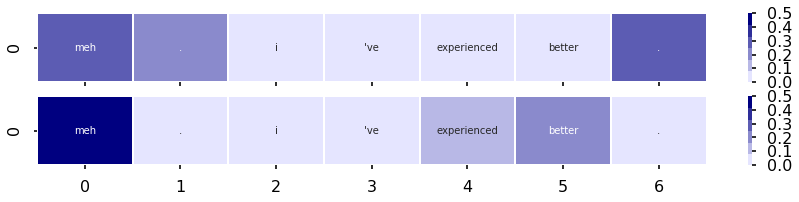

------------------------------


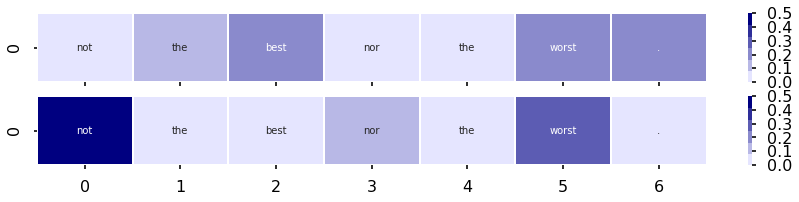

------------------------------


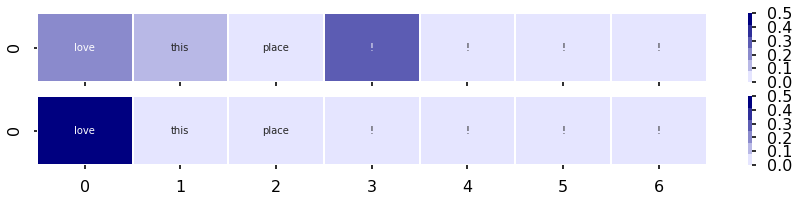

------------------------------


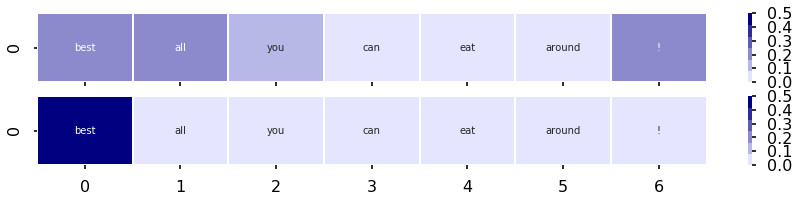

------------------------------


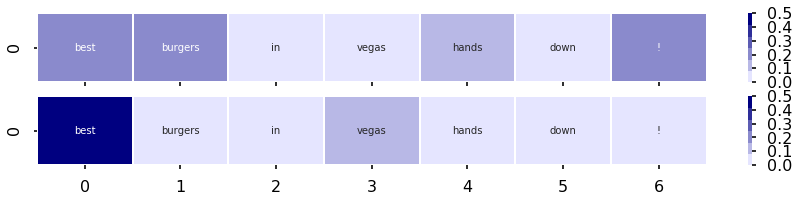

------------------------------


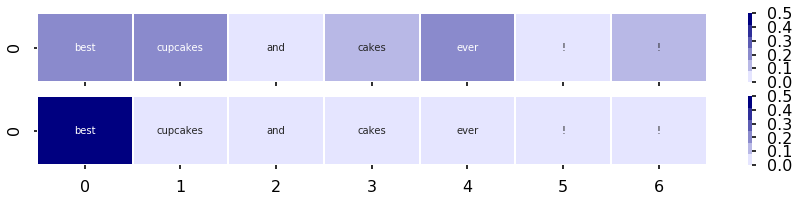

------------------------------


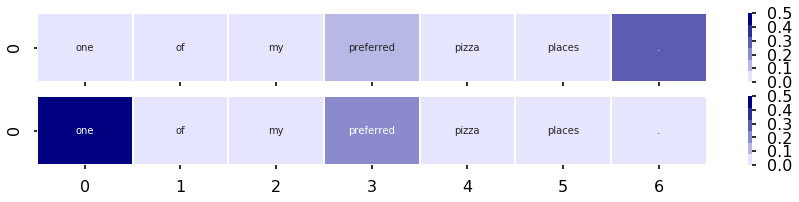

------------------------------


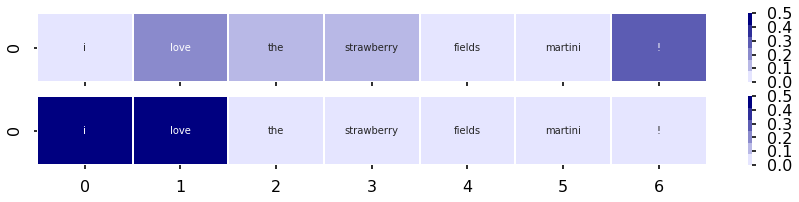

------------------------------


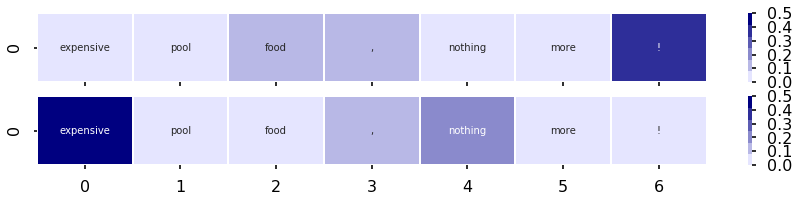

------------------------------


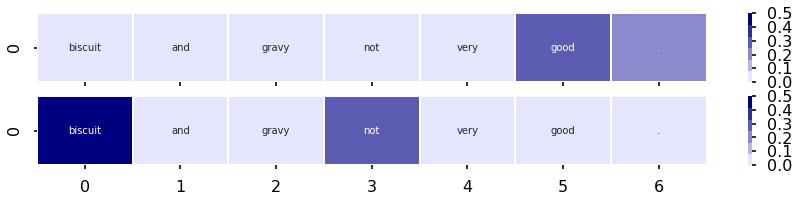

------------------------------


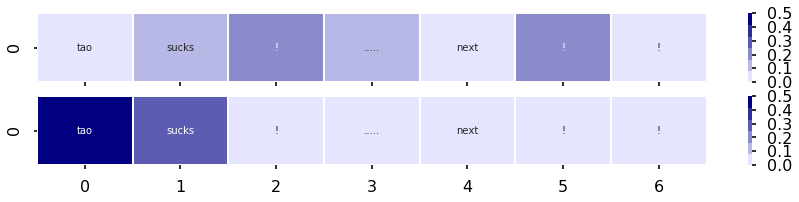

------------------------------


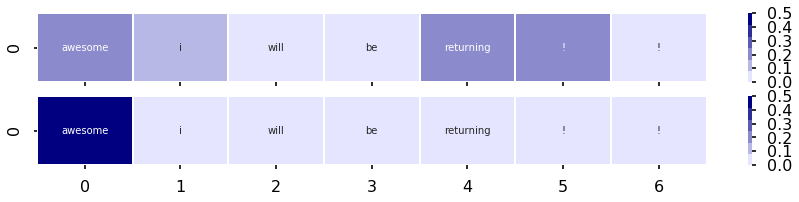

------------------------------


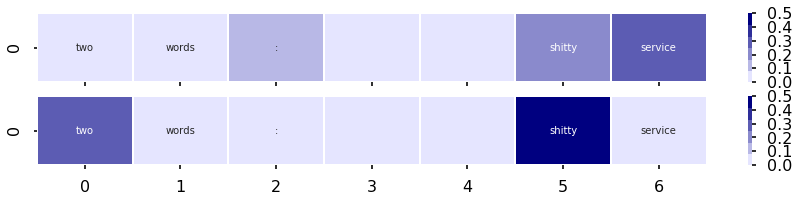

------------------------------


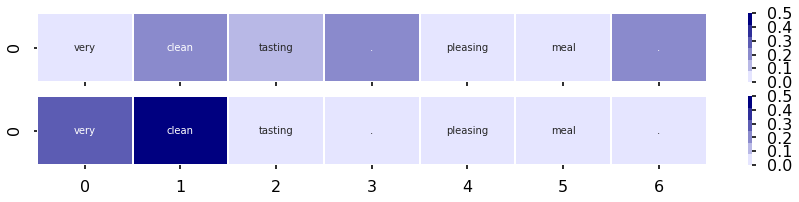

------------------------------


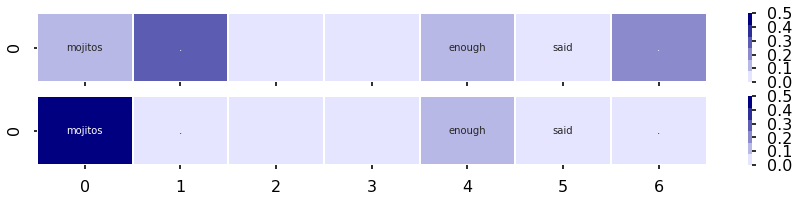

------------------------------


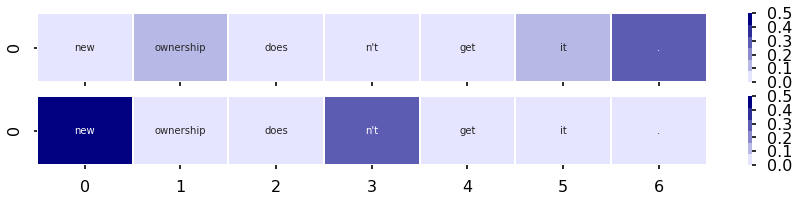

number of comparisons: 16


In [39]:
output1 = get_outputs(base_dir1)
output2 = get_outputs(base_dir2)
# print(len(output1['attn_hat']))


count = print_attention(output1,output2)
print("number of comparisons: {}".format(count))

In [40]:
#crop pngs to remove whitespace
print("Cropping saved pngs")

for l in os.listdir(path_to_png):
    if(l == '.DS_Store'):
        continue
    crop_img(path_to_png+l)
    

print("Done cropping")
            


Cropping saved pngs
Done cropping
